In [1]:
from wind_action_secc4 import *

import numpy as np

#install voila to see the display without code
#!pip install voila

# Eurocode 1: Actions on structures —
## Part 1-4: General actions — Wind actions


# Section 4 Wind velocity and velocity pressure 
## 4.1 Basis for calculation 
(1) The wind velocity and the velocity pressure are composed of a mean and a fluctuating component.

The mean wind velocity vm should be determined from the basic wind velocity vb which depends on the 
wind climate as described in 4.2, and the height variation of the wind determined from the terrain 
roughness and orography as described in 4.3. The peak velocity pressure is determined in 4.5. 

The fluctuating component of the wind is represented by the turbulence intensity defined in 4.4.

NOTE The National Annex may provide National climatic information from which the mean wind velocity 
$v_m$, the peak velocity pressure $q_p$ and additional values may be directly obtained for the terrain categories 
considered.

## 4.2 Basic values 
(1)P The fundamental value of the basic wind velocity, $v_{b,0}$, is the characteristic $10$ minutes mean wind 
velocity, irrespective of wind direction and time of year, at $10 m$ above ground level in open country 
terrain with low vegetation such as grass and isolated obstacles with separations of at least $20$ 
obstacle heights. 

NOTE 1 This terrain corresponds to terrain category II in Table 4.1. 

NOTE 2 The fundamental value of the basic wind velocity, $v_{b,0}$, may be given in the National Annex. 

(2)P The basic wind velocity shall be calculated from Expression (4.1).


In [2]:
# Define values
c_dir = 1.0
c_season = 1.0
v_b0 = 27.0  # km/h
p = 0.01
K = 0.2
n = 0.5
rho = 1.25
z_max = 200.0  # m
z_0 = 0.003  # m
z_min = 1.0  # m
z_0II = 0.005  # m
k_I = 1.00
A_ref = 800.0  # m2
c_d = 1.00
c_f = 1.55
c_0 = 1.00
c_pe=1.50
c_pi=1.0
c_fr=0.5
A_fr=500.0


In [3]:
display(v_b_func())
display(v_b_func(c_dir=c_dir, c_season=c_season, v_b0=v_b0))
v_b=v_b_func(c_dir=c_dir, c_season=c_season, v_b0=v_b0).doit()
display(v_b_func(c_dir=c_dir, c_season=c_season, v_b0=v_b0).doit())

where:

$v_b$ is the basic wind velocity, defined as a function of wind direction and time of year at $10 m$ 
above ground of terrain category II 

$v_{b,0}$ is the fundamental value of the basic wind velocity, see (1)P

$c_{dir}$ is the directional factor, see Note 2. 

$c_{season}$ is the season factor, see Note 3. 

NOTE 1 Where the influence of altitude on the basic wind velocity vb is not included in the specified 
fundamental value $v_{b,0}$  the National Annex may give a procedure to take it into account.

NOTE 2 The value of the directional factor, $c_{dir}$, for various wind directions may be found in the National 
Annex. The recommended value is $1.0$.

NOTE 3 The value of the season factor, cseason, may be given in the National Annex. The recommended 
value is $1.0$.

NOTE 4 The $10$ minutes mean wind velocity having the probability $p$ for an annual exceedence is 
determined by multiplying the basic wind velocity vb in 4.2 (2)P by the probability factor, cprob given by 
Expression (4.2). See also EN 1991-1-6.

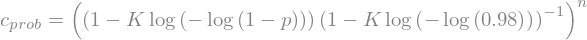

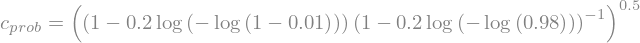

In [4]:
display(c_prob_func())
display(c_prob_func(K=K,p=p,n=n))
display(N(c_prob_func(K=K,p=p,n=n).doit(),3))

where:

$K$ is the shape parameter depending on the coefficient of variation of the extreme-value distribution. 

$n$ is the exponent. 

NOTE 5 The values for $K$ and $n$ may be given in the National Annex. The recommended values are $0,2$ 
for $K$ and $0,5$ for $n$.

(3) For temporary structures and for all structures in the execution phase, the seasonal factor cseason
may be used. For transportable structures, which may be used at any time in the year, cseason should 
be taken equal to $1.0$.

NOTE See also EN 1991-1-6.

## 4.3 Mean wind 
### 4.3.1 Variation with height 

(1) The mean wind velocity $v_m(z)$ at a height $z$ above the terrain depends on the terrain roughness 
and orography and on the basic wind velocity, $v_b$, and should be determined using Expression (4.3) 

In [5]:
z=1.0

In [6]:
params_list=[c_dir, c_season, v_b0, p, K, n, rho,
		 z_max, z_0, z_min, z_0II, k_I, A_ref,
		 c_d, c_f, c_0, c_pe, c_pi, c_fr, A_fr]
calculator = Calculator(params_list)
display(v_m_func())
v_m=v_m_func(z=z, c_0=c_0,v_b=v_b.rhs,c_r=N(calculator.c_r(z).tolist(),3))
display(v_m)
display(N(v_m.doit(),3))

where: 

$c_r(z)$ is the roughness factor, given in 4.3.2 

$c_o(z)$ is the orography factor, taken as $1.0$ unless otherwise specified in 4.3.3 

NOTE 1 Information on $c_O$ may be given in the National Annex. If the orography is accounted for in the 
basic wind velocity, the recommended value is $1.0$.

NOTE 2 Design charts or tables for $v_m(z)$ may be given in the National Annex.

The influence of neighbouring structures on the wind velocity should be considered (see 4.3.4

### 4.3.2 Terrain roughness 

(1) The roughness factor, $c_r(z)$, accounts for the variability of the mean wind velocity at the site of the 
structure due to: 

the height above ground level 

the ground roughness of the terrain upwind of the structure in the wind direction considered 

NOTE The procedure for determining $c_r(z)$ may be given in the National Annex. The recommended 
procedure for the determination of the roughness factor at height $z$ is given by Expression (4.4) and is 
based on a logarithmic velocity profile.

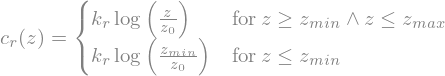

In [7]:
display(c_r_func())
c_r=c_r_func(z=z, z_min=z_min, z_max=z_max, z_0=z_0, k_r=N(k_r_func(z_0=z_0,z_0II=z_0II).doit().rhs,3) , UE=False)
display(c_r)
display(N(c_r.doit(),3))

where: 
$z_0$ is the roughness length 
$k_r$ terrain factor depending on the roughness length $z_0$ calculated using 


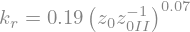

In [8]:
display(k_r_func())
k_r=k_r_func(z_0=z_0,z_0II=z_0II)
display(k_r)
display(N(k_r.doit(),3))

where: 
$z_{0,II} = 0,05 m$ (terrain category II, Table 4.1) 

$z_{min} is the minimum height defined in Table 4.1 

$z_{max}$ is to be taken as $200 m$ 

$z_0$, $z_{min}$ depend on the terrain category. Recommended values are given in Table 4.1 depending on five 
representative terrain categories.

Expression (4.4) is valid when the upstream distance with uniform terrain roughness is long enough to 
stabilise the profile sufficiently, see (2).
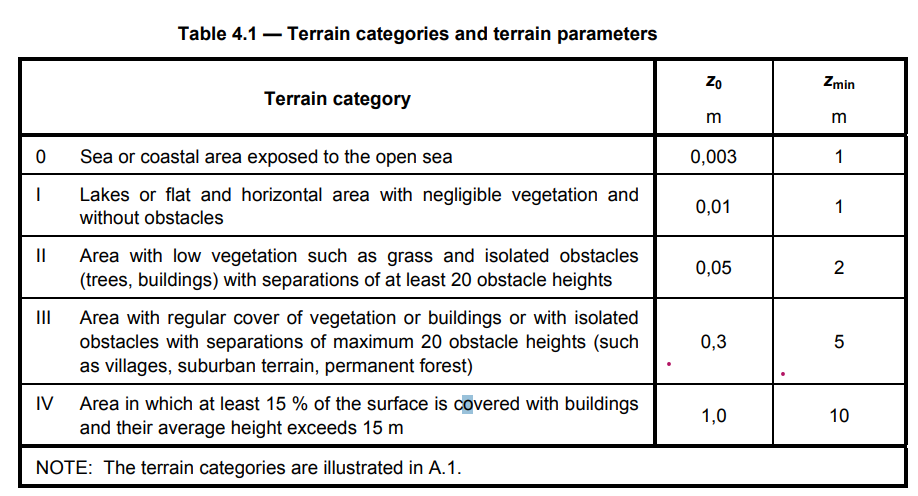

(2) The terrain roughness to be used for a given wind direction depends on the ground roughness and 
the distance with uniform terrain roughness in an angular sector around the wind direction. Small 
areas (less than $10%$ of the area under consideration) with deviating roughness may be ignored. See 
Figure 4.1. 
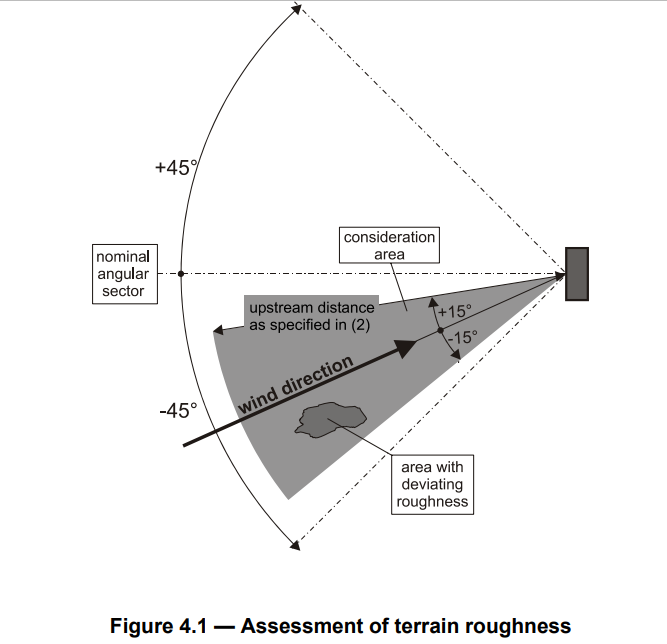

NOTE The National Annex may give definitions of the angular sector and of the upstream distance. The 
recommended value of the angular sector may be taken as the $30º$ angular sector within $±15°$ from the 
wind direction. The recommended value for the upstream distance may be obtained from A.2. 

(3) When a pressure or force coefficient is defined for a nominal angular sector, the lowest roughness 
length within any $30°$ angular wind sector should be used. 

(4) When there is choice between two or more terrain categories in the definition of a given area, then 
the area with the lowest roughness length should be used.

### 4.3.3 Terrain orography 

(1) Where orography (e.g. hills, cliffs etc.) increases wind velocities by more than $5%$ the effects 
should be taken into account using the orography factor $c_O$.

NOTE The procedure to be used for determining $c_O$ may be given in the National Annex. The 
recommended procedure is given in A.3. 

(2) The effects of orography may be neglected when the average slope of the upwind terrain is less 
than $3°$. The upwind terrain may be considered up to a distance of $10$ times the height of the isolated 
orographic feature.

### 4.3.4 Large and considerably higher neighbouring structures 

(1) If the structure is to be located close to another structure, that is at least twice as high as the 
average height of its neighbouring structures, then it could be exposed (dependent on the properties 
of the structure) to increased wind velocities for certain wind directions. Such cases should be taken 
into account. 
NOTE The National Annex may give a procedure to take account of this effect. A recommended 
conservative first approximation is given in A.4.

### 4.3.5 Closely spaced buildings and obstacles 

(1) The effect of closely spaced buildings and other obstacles may be taken into account. 
NOTE The National Annex may give a procedure. A recommended first approximation is given in A.5. In 
rough terrain closely spaced buildings modify the mean wind flow near the ground, as if the ground level 
was raised to a height called displacement height hdis.

## 4.4 Wind turbulence 

(1) The turbulence intensity $I_v(z)$ at height $z$ is defined as the standard deviation of the turbulence 
divided by the mean wind velocity. 

NOTE 1 The turbulent component of wind velocity has a mean value of $0$ and a standard deviation $\sigma_v$. The 
standard deviation of the turbulence $\sigma_v$ may be determined using Expression (4.6). 

In [9]:
display(sigma_v_func())
sigma_v=sigma_v_func(k_r=N(k_r.doit().rhs,3), v_b=v_b.rhs, k_I=k_I)
display(sigma_v)
display(N(sigma_v.doit(),3))

For the terrain factor $k_r$ see Expression (4.5), for the basic wind velocity $v_b$ see Expression (4.1) and for 
turbulence factor $k_I$ see Note 2. 

NOTE 2 The recommended rules for the determination of $I_v(z)$ are given in Expression (4.7)

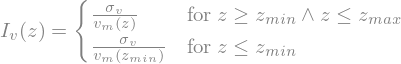

In [10]:
display(I_v_func())
I_v=I_v_func(z=z,z_min=z_min, z_max=z_max, z_0=z_0, sigma_v=sigma_v.rhs, v_m=v_m.rhs, UE=False)
display(I_v)
display(N(I_v.doit(),3))

where:

$k_I$ is the turbulence factor. The value of kI may be given in the National Annex. The recommended value 
for $k_I$ is $1,0$.

$c_o$ is the orography factor as described in 4.3.3 

$z_0$ is the roughness length, given in Table 4.1

## 4.5 Peak velocity pressure 

(1) The peak velocity pressure $q_p(z)$ at height $z$, which includes mean and short-term velocity 
fluctuations, should be determined. 

NOTE 1 The National Annex may give rules for the determination of $q_p(z)$. The recommended rule is given 
in Expression (4.8).

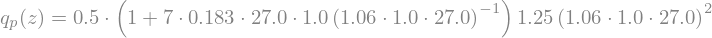

In [11]:
display(q_p_func())
q_p= q_p_func(z=z, I_v=I_v.rhs, rho=rho, v_m=v_m.rhs)
display(q_p)
display(N(q_p.doit(),3))

where: 
$\rho$ is the air density, which depends on the altitude, temperature and barometric pressure to be 
expected in the region during wind storms 

$c_e(z)$ is the exposure factor given in Expression (4.9) 


In [12]:
display(c_e_func())
q_b=q_b_func(rho=rho, v_b=v_b.rhs)
c_e=c_e_func(z=z,q_p=N(q_p.doit().rhs,3), q_b=N(q_b.doit().rhs,3))
display(c_e)
display(N(c_e.doit(),3))

$q_b$ is the basic velocity pressure given in Expression (4.10)

In [13]:
display(q_b_func())
display(q_b)
display(N(q_b.doit(),3))

NOTE 2 The values for $\rho$ may be given in the National Annex. The recommended value is $1,25 kg/m3$
. 
NOTE 3 The value $7$ in Expression (4.8) is based on a peak factor equal to $3,5$ and is consistent with the 
values of the pressure and force coefficients in Section 7. 

For flat terrain where $c_O(z) = 1,0$ (see 4.3.3), the exposure factor $c_e(z)$ is illustrated in Figure 4.2 as a 
function of height above terrain and a function of terrain category as defined in Table 4.1. 
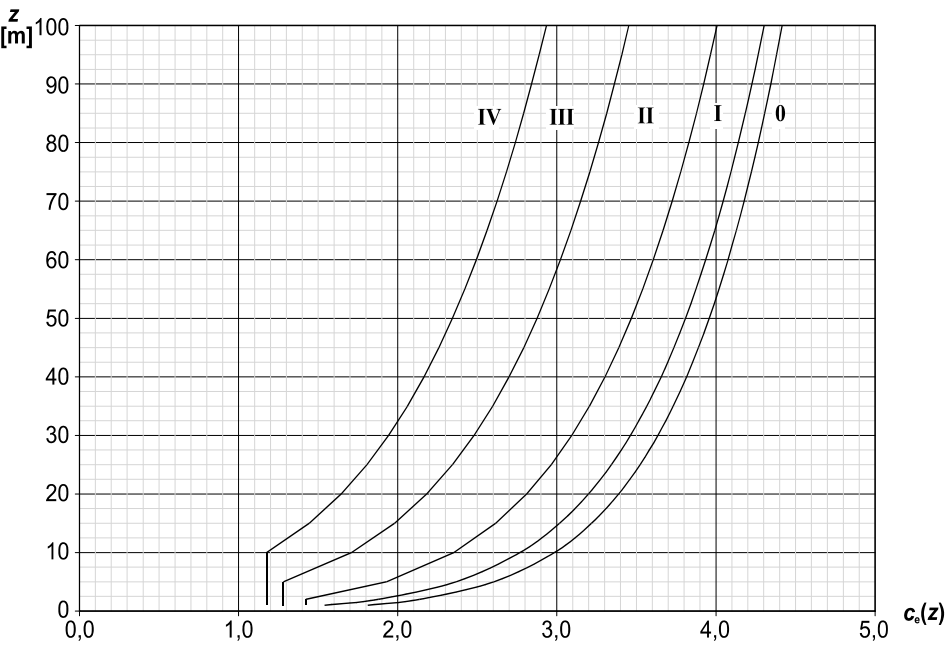

C:\Users\cfcpc2\Documents\GitHub\GitHub_CFC\Wind_Action\wind_action_secc4.py:220: RuntimeWarning: divide by zero encountered in log
  funclist = [k_r() * np.log(z / z_0), k_r() * np.log(z_min / z_0)]


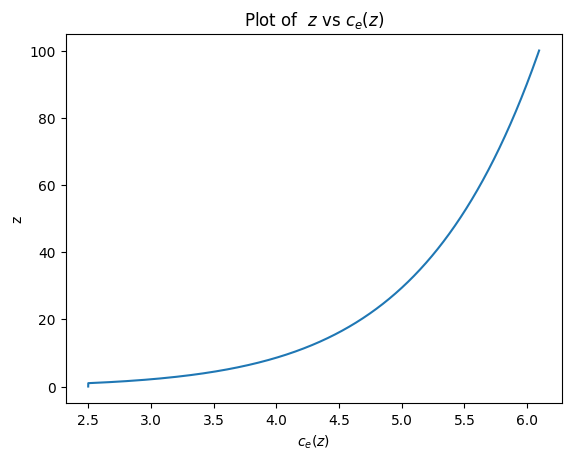

In [14]:
import warnings
# Generate 1000 points linearly spaced between 0 and 100
z_values = np.linspace(0, 100, 1000)
#c_ez=c_ez(z,c_dir=c_dir,c_season=c_season,v_b0=v_b0,p=p,K=K,n=n,rho=rho,z_max=z_max,z_0=z_0,z_min=z_min,z_0II=z_0II, k_I=k_I, A_ref=A_ref, c_d=c_d, c_f=c_f,c_0=c_0)
# Calculate c_e for each value of z
c_ez_values = [c_ez(z) for z in z_values]

# Plotting the results
plt.plot( c_ez_values,z_values)
plt.xlabel('$c_e(z)$')
plt.ylabel('z')
plt.title(f'''Plot of  $z$ vs $c_e(z)$''')

# Display the plot in Streamlit
plt.show()
#showPyplotGlobalUse = False
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

# Section 5 Wind actions 

## 5.1 General 

(1)P Wind actions on structures and structural elements shall be determined taking account of both 
external and internal wind pressures. 

NOTE A summary of calculation procedures for the determination of wind actions is given in Table 5.1. 
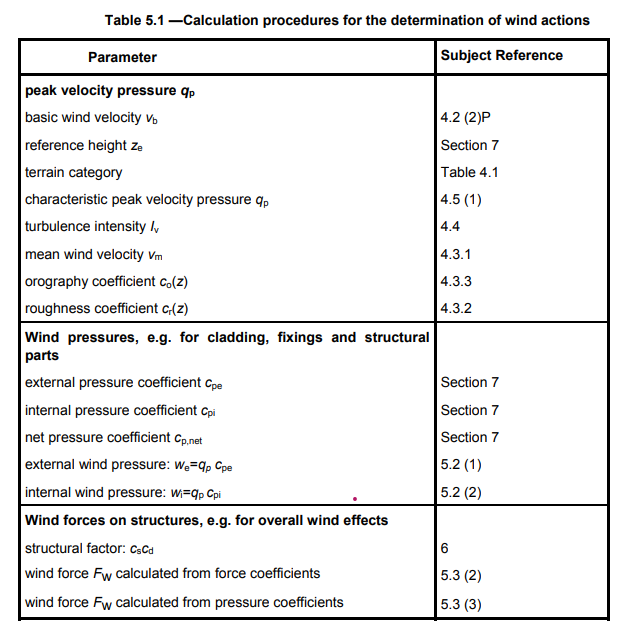

## 5.2 Wind pressure on surfaces 

(1) The wind pressure acting on the external surfaces, $w_e$ , should be obtained from Expression (5.1).

In [15]:
z_e=10.0

In [16]:
display(W_e_func())
W_e=W_e_func(z_e=z_e,q_p=N(calculator.q_p(z_e),3), c_pe=c_pe)
display(W_e)
display(N(W_e.doit(),3))

where: 

$q_p(ze)$ is the peak velocity pressure 

$z_e$ is the reference height for the external pressure given in Section 7 

$c_{pe}$ is the pressure coefficient for the external pressure, see Section 7.

(2) The wind pressure acting on the internal surfaces of a structure, $w_i$, should be obtained from 
Expression (5.2)

In [17]:
z_i=5.0

In [18]:
display(W_i_func())
W_i=W_i_func(z_i=z_i,q_p=N(calculator.q_p(z_i),3), c_p_i=c_pi)
display(W_i)
display(N(W_i.doit(),3))

where:

$q_p(z_i)$ is the peak velocity pressure 

$z_i$ is the reference height for the internal pressure given in Section 7 

$c_{pi}$ is the pressure coefficient for the internal pressure given in Section 7 

NOTE $q_p(z)$ is defined in 4.5

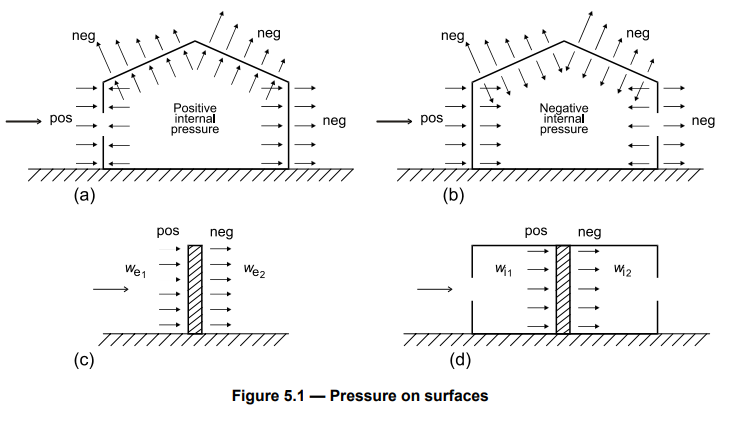


## 5.3 Wind forces 

(1) The wind forces for the whole structure or a structural component should be determined: 

- by calculating forces using force coefficients (see (2)) or 
- by calculating forces from surface pressures (see (3)) 

(2) The wind force Fw acting on a structure or a structural component may be determined directly by 
using Expression (5.3)

In [19]:
display(F_w_func())
F_w=F_w_func(z_e=z_e,c_s=c_season, c_d=c_d,c_f=c_f,q_p=N(calculator.q_p(z_e),3),A_ref=A_ref)
display(F_w)
display(N(F_w.doit(),3))

Friction forces, $F_{fr}$:


In [20]:
display(F_fr_func())
F_fr=F_fr_func(z_e=z_e,c_fr=c_fr,q_p=N(calculator.q_p(z_e),3),A_fr=A_fr)
display(F_fr)
display(N(F_fr.doit(),3))

# Section 6 Structural factor $c_sc_d$
## 6.1 General 

(1) The structural factor $c_sc_d$ should take into account the effect on wind actions from the nonsimultaneous occurrence of peak wind pressures on the surface ($c_s$) together with the effect of the vibrations of the structure due to turbulence ($c_d$). 

NOTE The structural factor $c_sc_d$ may be separated into a size factor $c_s$ and a dynamic factor $c_d$, based 
on 6.3. Information on whether the structural factor cscd should be separated or not may be given in the 
National Annex. 

## 6.2 Determination of $c_sc_d$

(1) $c_sc_d$ may be determined as follows: 

a) For buildings with a height less than $15 m$ the value of cscd may be taken as $1.$ 

b) For facade and roof elements having a natural frequency greater than $5 Hz$, the value of cscd may 
be taken as $1$. 

c) For framed buildings which have structural walls and which are less than $100 m$ high and whose 
height is less than $4$ times the in-wind depth, the value of cscd may be taken as $1$. 

d) For chimneys with circular cross-sections whose height is less than $60 m$ and $6,5$ times the 
diameter, the value of cscd may be taken as $1$. 

e) Alternatively, for cases a), b), c) and d) above, values of $c_sc_d$ may be derived from 6.3.1. 

f) For civil engineering works (other than bridges, which are considered in Section 8), and chimneys 
and buildings outside the limitations given in c) and d) above, $c_sc_d$ should be derived either from 
6.3 or taken from Annex D. 

NOTE 1 Natural frequencies of facade and roof elements may be calculated using Annex F (glazing 
spans smaller than $3 m$ usually lead to natural frequencies greater than $5 Hz$)

NOTE 2 The figures in Annex D give values of $c_sc_d$ for various types of structures. The figures give 
envelopes of safe values calculated from models complying with the requirements in 6.3.1. 

## 6.3 Detailed procedure 

### 6.3.1 Structural factor $c_sc_d$

(1) The detailed procedure for calculating the structural factor cscd is given in Expression (6.1). This 
procedure can only be used if the conditions given in 6.3.1 (2) apply. 

In [21]:
B=20.0
R=10.0
z_s=5.0
k_p=0.5


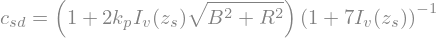

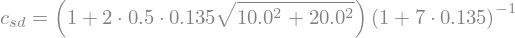

In [22]:
display(c_sd_func())
c_ds=c_sd_func(z_s=z_s, k_p=k_p, I_v=N(calculator.I_v(z_s),3), B=B, R=R)
display(c_ds)
display(N(c_ds.doit(),3))

where: 

$z_s$ is the reference height for determining the structural factor, see Figure 6.1. For structures 

where Figure 6.1 does not apply $z_s$ may be set equal to $h$, the height of the structure. 

$k_p$ is the peak factor defined as the ratio of the maximum value of the fluctuating part of the 
response to its standard deviation

$I_v$ is the turbulence intensity defined in 4.4 
$B_2$ is the background factor, allowing for the lack of full correlation of the pressure on the structure 
surface 

$R_2$is the resonance response factor, allowing for turbulence in resonance with the vibration mode 

NOTE 1 The size factor $c_s$ takes into account the reduction effect on the wind action due to the nonsimultaneity of occurrence of the peak wind pressures on the surface and may be obtained from 
Expression (6.2): 


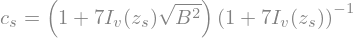

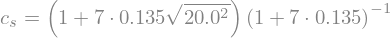

In [23]:
display(c_s_func())
c_s=c_s_func(z_s=z_s, k_p=k_p, I_v=N(calculator.I_v(z_s),3), B=B, R=R)
display(c_s)
display(N(c_s.doit(),3))


NOTE 2 The dynamic factor $c_d$ takes into account the increasing effect from vibrations due to turbulence 
in resonance with the structure and may be obtained from Expression (6.3):

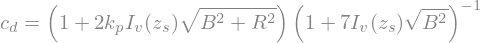

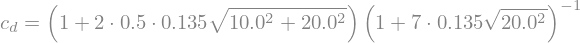

In [24]:
display(c_d_func())
c_d=c_d_func(z_s=z_s, k_p=k_p, I_v=N(calculator.I_v(z_s),3), B=B, R=R)
display(c_d)
display(N(c_d.doit(),3))

NOTE 3 The procedure to be used to determine $k_p$, $B$ and $R$ may be given in the National Annex. A 
recommended procedure is given in Annex B. An alternative procedure is given in Annex C. As an 
indication to the users the differences in $c_sc_d$ using Annex C compared to Annex B does not exceed 
approximately $5%$.

(2)P Expression (6.1) shall only be used if all of the following requirements are met: 
 
 - the structure corresponds to one of the general shapes shown in Figure 6.1, 
 - only the along-wind vibration in the fundamental mode is significant, and this mode shape has a 
    constant sign. 

NOTE The contribution to the response from the second or higher alongwind vibration modes is 
negligible.

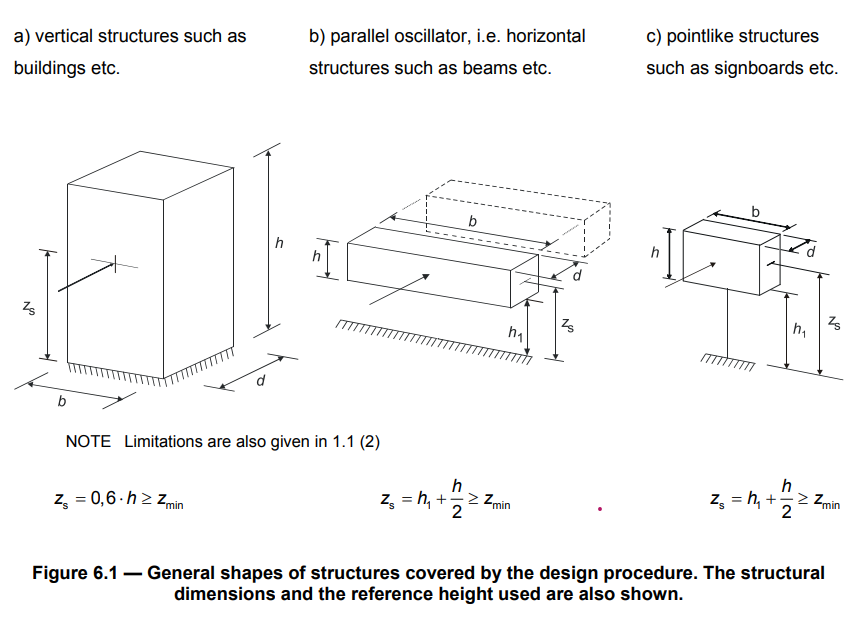

